<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Открыть-файлы-с-данными-и-изучить-общую-информацию" data-toc-modified-id="Открыть-файлы-с-данными-и-изучить-общую-информацию-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Открыть файлы с данными и изучить общую информацию</a></span></li><li><span><a href="#Сделать-предобработку-данных" data-toc-modified-id="Сделать-предобработку-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Сделать предобработку данных</a></span></li><li><span><a href="#Провести-исследовательский-анализ-данных" data-toc-modified-id="Провести-исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Провести исследовательский анализ данных</a></span></li><li><span><a href="#Подготовить-данные-для-обучения-моделей" data-toc-modified-id="Подготовить-данные-для-обучения-моделей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Подготовить данные для обучения моделей</a></span></li><li><span><a href="#Обучить-несколько-моделей" data-toc-modified-id="Обучить-несколько-моделей-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Обучить несколько моделей</a></span></li><li><span><a href="#Тестирование-лучшей-модели" data-toc-modified-id="Тестирование-лучшей-модели-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Тестирование лучшей модели</a></span></li><li><span><a href="#Сделать-выводы" data-toc-modified-id="Сделать-выводы-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Сделать выводы</a></span></li></ul></div>

# Телеком: исследование оттока клиентов

__Описание проекта__

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать
отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут
предложены промокоды и специальные условия. Команда оператора
собрала персональные данные о некоторых клиентах, информацию об их
тарифах и договорах. 



__Описание услуг__

Оператор предоставляет два основных типа услуг: 

- Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
- Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line, «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).

Также доступны такие услуги:

- Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);
- Выделенная линия технической поддержки (TechSupport);
- Облачное хранилище файлов для резервного копирования данных (OnlineBackup);
- Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

__План выполнения проекта__

0. Изучение предметной области 
1. Открыть файлы с данными и изучить общую информацию
2. Сделать предобработку данных
3. Провести исследовательский анализ данных
4. Подготовить данные для обучения моделей 
5. Обучить несколько моделей
6. Тестирование лучшей модели 
7. Сделать выводы

__Описание данных__

Данные состоят из файлов, полученных из разных источников:
    
- **contract_new.csv** — информация о договоре;
- **personal_new.csv** — персональные данные клиента;
- **internet_new.csv** — информация об интернет-услугах;
- **phone_new.csv** — информация об услугах телефонии.

Во всех файлах столбец customerID содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

__Обозначения признаков__

- BeginDate – дата начала пользования услугами,
- EndDate – дата окончания пользования услугами,
- Type – тип оплаты: ежемесячный, годовой и тд,
- PaperlessBilling – безналичный расчет,
- PaymentMethod – способ оплаты,
- MonthlyCharges – ежемесячные траты на услуги,
- TotalCharges – всего потрачено денег на услуги
- Dependents – наличие иждивенцев
- Senior Citizen – наличие пенсионного статуса по возрасту
- Partner – наличие супруга(и)
- MultipleLines – наличие возможности ведения параллельных линий во время звонка

### Открыть файлы с данными и изучить общую информацию

In [1]:
import warnings

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import phik

from sklearn.model_selection import (
    GridSearchCV, 
    RandomizedSearchCV,
    train_test_split
)


from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler
)


from sklearn.inspection import permutation_importance
from sklearn.compose import (make_column_transformer, 
    ColumnTransformer)

from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier


from sklearn.metrics import (
    ConfusionMatrixDisplay, 
    confusion_matrix, 
    roc_auc_score,
    roc_curve
)



In [2]:
try:
    contract = pd.read_csv('/datasets/contract_new.csv')
    personal = pd.read_csv('/datasets/personal_new.csv')
    internet = pd.read_csv('/datasets/internet_new.csv')
    phone = pd.read_csv('/datasets/phone_new.csv')
    
except:
    contract = pd.read_csv('/datasets/contract_new.csv')
    personal = pd.read_csv('/datasets/personal_new.csv')
    internet = pd.read_csv('/datasets/internet_new.csv')
    phone = pd.read_csv('/datasets/phone_new.csv')

Изучим какие данные хранятся в датафреймах

**Информация о договоре**

In [3]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [4]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


**Персональные данные клиента**

In [5]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [6]:
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


**Информация об интернет-услугах**

In [7]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [8]:
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


**Информация об услугах телефонии**

In [9]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [10]:
phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


**ВЫВОД 1:**

Перед нами задача классификаци: нужно определить уйдет клиент или нет. В распоряжении четыре датафрейма с одним общим признаком "customerID", которые датируются с 2013 по 2020 год, всего 19 признаков.

На следующем этапе нужно:
   - объединить таблицы 
   - добавить два новых признака 
   - доработать признак EndDate

### Сделать предобработку данных

Перед тем как приступить к предобработке, нужно из четырёх таблиц сделать одну. Объединим таблицы методом merge, сделаем идексацию по признаку 'customerID' и посмотрим на результат

- contract — информация о договоре;
- personal — персональные данные клиента;
- internet — информация об интернет-услугах;
- phone — информация об услугах телефонии.

In [11]:
# Объединяем таблицы
data = (contract.merge(personal, how='left', on='customerID')
        .merge(internet, how='left', on='customerID')
        .merge(phone, how='left', on='customerID')
        .set_index('customerID'))

In [12]:
data.head(2)

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BeginDate         7043 non-null   object 
 1   EndDate           7043 non-null   object 
 2   Type              7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
 7   gender            7043 non-null   object 
 8   SeniorCitizen     7043 non-null   int64  
 9   Partner           7043 non-null   object 
 10  Dependents        7043 non-null   object 
 11  InternetService   5517 non-null   object 
 12  OnlineSecurity    5517 non-null   object 
 13  OnlineBackup      5517 non-null   object 
 14  DeviceProtection  5517 non-null   object 
 15  TechSupport       5517 non-null   object 
 16  StreamingTV       5517 non-null 

Посмотрим более подробно какие уникальные значения есть в каждом из признаков:

In [14]:
# Цикл для вывода уникальных значений
for i in data.columns:
    print('-' * 30)
    print('Значения признака:', i)
    print('-' * 30)
    print(data[i].sort_values().unique())

------------------------------
Значения признака: BeginDate
------------------------------
['2013-10-01' '2013-11-01' '2013-12-01' '2014-01-01' '2014-02-01'
 '2014-03-01' '2014-04-01' '2014-05-01' '2014-06-01' '2014-07-01'
 '2014-08-01' '2014-09-01' '2014-10-01' '2014-11-01' '2014-12-01'
 '2015-01-01' '2015-02-01' '2015-03-01' '2015-04-01' '2015-05-01'
 '2015-06-01' '2015-07-01' '2015-08-01' '2015-09-01' '2015-10-01'
 '2015-11-01' '2015-12-01' '2016-01-01' '2016-02-01' '2016-03-01'
 '2016-04-01' '2016-05-01' '2016-06-01' '2016-07-01' '2016-08-01'
 '2016-09-01' '2016-10-01' '2016-11-01' '2016-12-01' '2017-01-01'
 '2017-02-01' '2017-03-01' '2017-04-01' '2017-05-01' '2017-06-01'
 '2017-07-01' '2017-08-01' '2017-09-01' '2017-10-01' '2017-11-01'
 '2017-12-01' '2018-01-01' '2018-02-01' '2018-03-01' '2018-04-01'
 '2018-05-01' '2018-06-01' '2018-07-01' '2018-08-01' '2018-09-01'
 '2018-10-01' '2018-11-01' '2018-12-01' '2019-01-01' '2019-02-01'
 '2019-03-01' '2019-04-01' '2019-05-01' '2019-06-01

- Признак 'EndDate' хранит дату окончания пользования услугами, значение No означает что клиент еще не ушел, можно заменить значение на дату выгрузки датасета с БД, а именно '2020-02-01'. 
- Признаки BeginDate и EndDate хранят дату, нужно изменить тип данных с object на datatime. 
- На основе EndDate сгенерируем целевой признак
- И добавим признак - количество дней, что клиент пользуется улугами
- Признак TotalCharges хранит пустые значения, их нужно обработать 

Для начала сгенерируем целевой признак 'target'

In [15]:
# Сгенерируем признак
data['target'] = (data['EndDate'] != 'No').astype('int')

In [16]:
# Заменяем значение No
data.loc[(data['EndDate'] == 'No'), 'EndDate'] = '2020-02-01'

In [17]:
# Меняем тип данных на datetime
data['BeginDate'] = pd.to_datetime(data['BeginDate'], format = '%Y-%m-%d')
data['EndDate'] = pd.to_datetime(data['EndDate'], format = '%Y-%m-%d')

Генерируем признак с количеством дней начала пользования услугами

In [18]:
# Сгенерируем признак
data['UsageTime'] = (data['EndDate'] - data['BeginDate']) / np.timedelta64 (1, 'D')

# Меняем тип данных на int
data['UsageTime'] = data['UsageTime'].astype('int')

Теперь обработаем TotalCharges. Признак хранит информацию об общих затратах, заполиним их признаком MonthlyCharges (ежемесячные траты на услуги):

In [19]:
# Заполняем пустые значения
data.loc[(data['TotalCharges'] == ' '), 'TotalCharges'] = data['MonthlyCharges']

# Меняем тип данных на float
data['TotalCharges'] = data['TotalCharges'].astype('float')

In [20]:
# Проверяем
data['TotalCharges'].sort_values().unique()

array([  19.05,   19.1 ,   19.19, ..., 9068.36, 9218.88, 9221.38])

Посмотрим на пропуски в данных:

In [21]:
data.isna().sum()

BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
MultipleLines        682
target                 0
UsageTime              0
dtype: int64

Заполним пропуски значением "No". Скорее всего, клиенты не пользуются этими услугами. Отсюда и незаполненные данные.

In [22]:
# Поставим заглушку
data = data.fillna('No')

# Проверяем
data.isna().sum()

BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
MultipleLines       0
target              0
UsageTime           0
dtype: int64

И на последок, признаки 'BeginDate', 'EndDate' нам бальше не нужны, их можно смело удалять

In [23]:
data = data.drop(['BeginDate', 'EndDate'], axis=1)

**Смотрим на результат:**

In [24]:
data.head(5)

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,target,UsageTime
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,No,0,31
5575-GNVDE,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No,0,1036
3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No,0,123
7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No,0,1371
9237-HQITU,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No,0,153


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              7043 non-null   object 
 1   PaperlessBilling  7043 non-null   object 
 2   PaymentMethod     7043 non-null   object 
 3   MonthlyCharges    7043 non-null   float64
 4   TotalCharges      7043 non-null   float64
 5   gender            7043 non-null   object 
 6   SeniorCitizen     7043 non-null   int64  
 7   Partner           7043 non-null   object 
 8   Dependents        7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  MultipleLines     7043 non-null 

**ВЫВОД 2:**

На этапе предобработки были сгенерированы два новых признака:
- UsageTime количество дней 
- target - факт ухода клиента 

Чтобы не было подглядывания*, избавились от 'BeginDate' и 'EndDate', заполнили пропуски в признаках с услугами.

Столбцы, что хранят значения по типу 'No' и 'Yes', можно перевести в булевый тип, но проще будет их просто закодировать уже в процессе подготовки для обучения, поэтому их пока не трогаем.

### Провести исследовательский анализ данных

Для начала посмотрим на корреляцию признаков. Так как у нас разношёрстные данные, мы используем корреляцию смешенного набора признаков - Phik.

interval columns not set, guessing: ['MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'target', 'UsageTime']


<function matplotlib.pyplot.show(close=None, block=None)>

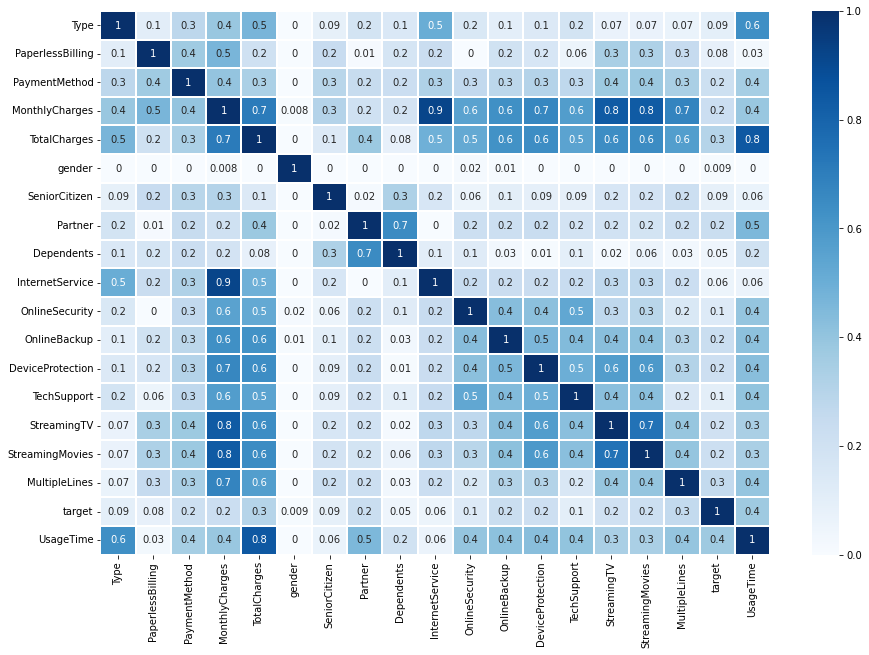

In [26]:
# Строим матрицу корреляции

plt.figure(figsize = (15, 10))
sns.heatmap(data.phik_matrix(), annot = True, 
            fmt='.1g', linewidths=2, cmap='Blues')
plt.show

Мы можем видеть:
- Целевой признак умеренно коррелируется с количеством дней, что клиент пользуется улугами (UsageTime)
- Слабую корреляцию таргет с:
    - PaymentMethod
    - MonthlyCharges
    - TotalCharges
    - StreamingTV
    - StreamingMovies
    - MultipleLines
- Меньше всего на факт ухода клиента влияет гендер 

Построим диаграмму размаха для численных признаков:

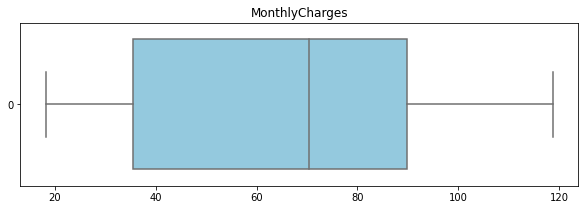

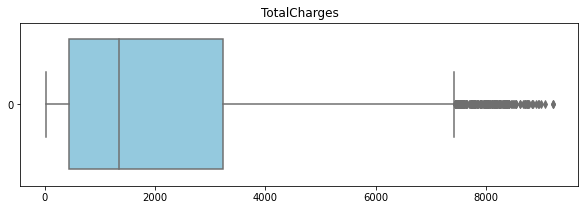

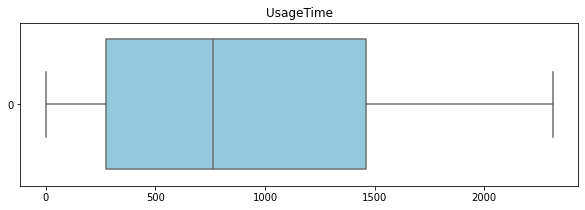

In [27]:
# Диаграмма размаха
def data_box(i):
    
    plt.figure(figsize=(10, 3))
    sns.boxplot(data=data[i], orient="h", color='skyblue')
    
    plt.title(i)
    plt.show()

data_box('MonthlyCharges')
data_box('TotalCharges')
data_box('UsageTime')

Признак TotalCharges показывает выбивающиеся значения. Но так как у нас данные с 2013 года, думаю это вполне нормально.
В остальных случаях выбросов нет

Далее посмотрим на распределение ушедших и оставшихся клиентов:

In [28]:
# Разделим данные по таргету
data_0 = data.loc[data['target'] == 0]
data_1 = data.loc[data['target'] == 1]

# Список всех бинарных признаков
cat_col = ['Type', 'PaperlessBilling', 'PaymentMethod', 'gender', 
               'SeniorCitizen', 'Partner', 'Dependents', 'InternetService', 
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 
               'StreamingTV', 'StreamingMovies', 'MultipleLines']

# Список всех численных признаков
num_col = ['MonthlyCharges', 'TotalCharges', 'UsageTime']

In [29]:
data_1['MonthlyCharges'].min()

18.4

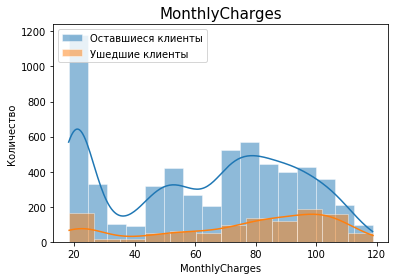

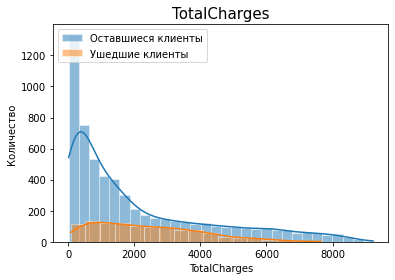

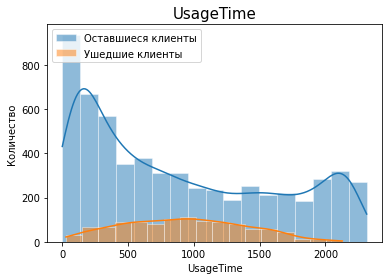

In [30]:
# Гистограмма для численных признаков
for i in num_col:
        
    plt.rc('axes', titlesize=15) 
    
    sns.histplot(data_0[i], kde=True, alpha = 0.5, 
                 edgecolor=(1, 1, 1, .4), label='Оставшиеся клиенты')
    
    sns.histplot(data_1[i], kde=True, alpha = 0.5, 
                 edgecolor=(1, 1, 1, .4), label='Ушедшие клиенты')
    
    plt.legend(loc='upper left')
    plt.ylabel('Количество')
    plt.title(i)
    plt.show()

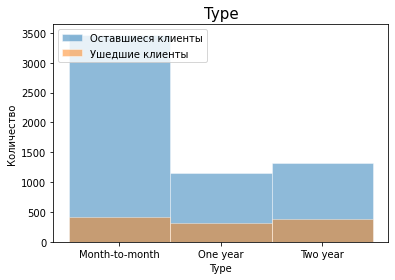

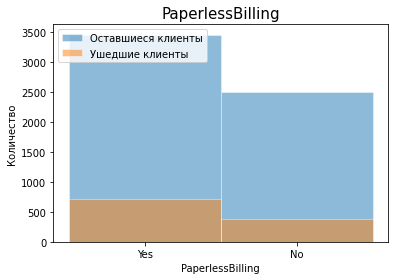

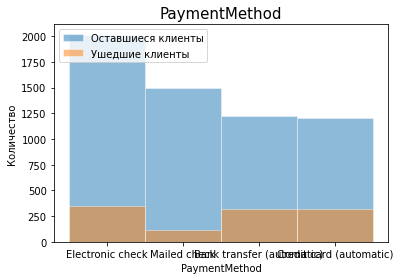

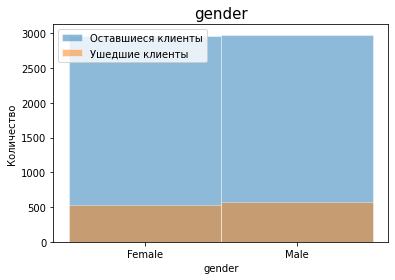

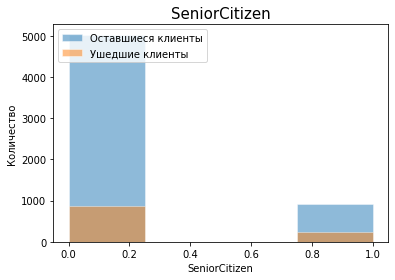

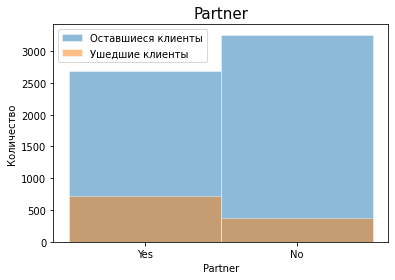

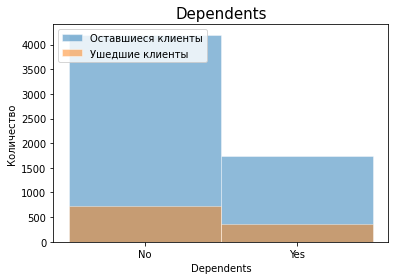

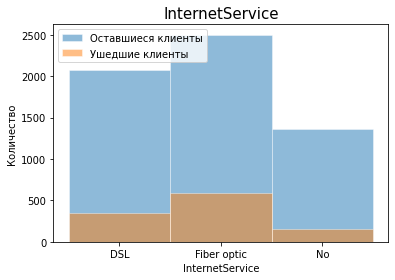

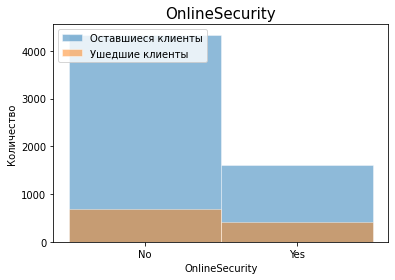

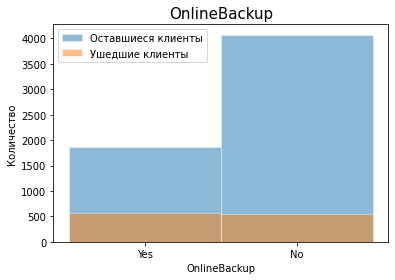

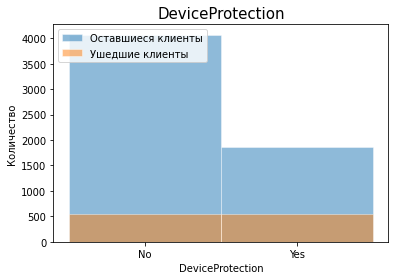

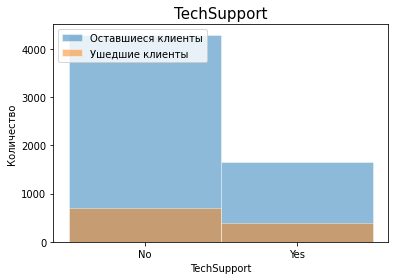

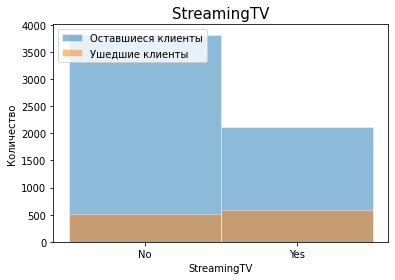

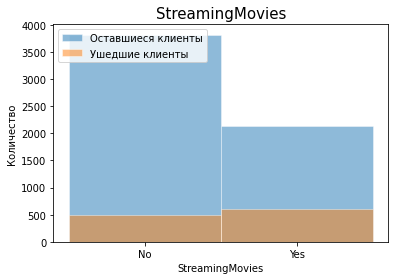

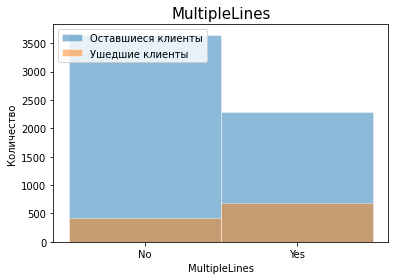

In [31]:
# Гистограмма для бинарных признаков
for i in cat_col:
    
    plt.rc('axes', titlesize=15)  
    
    sns.histplot(data_0[i], bins=(4), alpha = 0.5, 
                 edgecolor=(1, 1, 1, .4), label='Оставшиеся клиенты')
    
    sns.histplot(data_1[i], bins=(4), alpha = 0.5, 
                 edgecolor=(1, 1, 1, .4), label='Ушедшие клиенты')
    
    plt.legend(loc='upper left')
    plt.ylabel('Количество')
    plt.title(i)
    plt.show()


**ВЫВОД 3:**

На этапе исследовательского аназа выяснили, что в данных нет аномалий, мужчин и женщин примерно одинаковое количество, и что пол клиента не коррелируется с фактом ухода. 

В среднем бывшие клиенты пользовались услугами 2.5 года, минимум 28 дней. Максимум ежемесячных затрат состовляет 118, минимум 18.


### Подготовить данные для обучения моделей

In [32]:
# Разделяем данные на train и test
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('target', axis=1), data.target, test_size=0.25, random_state=280823)

In [33]:
print('Тренировочная выборка:', X_train.shape)
print('Тестовая выборка:', X_test.shape)
print()
print('Целевой признак тренировочная выборки:', y_train.shape)
print('Целевой признак тестовой выборки:', y_test.shape)

Тренировочная выборка: (5282, 18)
Тестовая выборка: (1761, 18)

Целевой признак тренировочная выборки: (5282,)
Целевой признак тестовой выборки: (1761,)


Для кодирования и масштабирования воспользуемся функцией make_column_transformer

In [34]:
#Создадим список всех бинарных признаков
cat_col = ['Type', 'PaperlessBilling', 'PaymentMethod', 'gender', 
               'SeniorCitizen', 'Partner', 'Dependents', 'InternetService', 
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 
               'StreamingTV', 'StreamingMovies', 'MultipleLines']

# Создадим список всех численных признаков
num_col = ['MonthlyCharges', 'TotalCharges', 'UsageTime']

In [35]:
# Кодирование для линейных моделей
ohe_transform = make_column_transformer((StandardScaler(), num_col), 
                            (OneHotEncoder(drop='first'), cat_col),
                            verbose_feature_names_out=False)

In [36]:
# Кодирование для деревянных моделей 
oe_transform = make_column_transformer((StandardScaler(), num_col), 
                            (OrdinalEncoder(), cat_col),
                            verbose_feature_names_out=False)

**ВЫВОД 4:**

Чтобы избежать ловушки, стандартизировали данные со StandardScaler().

Далее закодировали данные:
- для линейных меделей взяли OneHotEncoder()
- для деревьев OrdinalEncoder()

### Обучить несколько моделей

**Ridge**

In [37]:
%%time

pipeline = make_pipeline(ohe_transform,
    Ridge(random_state=280823, 
          max_iter=11000, 
          solver='auto')
)

param_grid = {'ridge__alpha': np.arange(0, 0.21, 0.01)}

ridge_scores = GridSearchCV(
    pipeline, 
    param_grid=param_grid, 
    scoring='roc_auc', 
    n_jobs=-1
)

ridge_scores.fit(X_train, y_train)


# лучшее значение ROC_AUC на кросс-валидации
print(f'best_score: {ridge_scores.best_score_}')

# лучшие гиперпараметры
print(f'best_params: {ridge_scores.best_params_}')

best_score: 0.7712974583610043
best_params: {'ridge__alpha': 0.19}
CPU times: user 1.25 s, sys: 72.6 ms, total: 1.32 s
Wall time: 5.4 s


**DecisionTreeClassifier**

In [38]:
%%time

pipeline = make_pipeline(
    oe_transform,
    DecisionTreeClassifier(random_state=280823, 
                           max_depth=10,
                           min_samples_leaf=34, 
                           min_samples_split=9,
                           class_weight = 'balanced')
)

param_grid = {}

qrid_dt = GridSearchCV(
    pipeline, 
    param_grid=param_grid, 
    scoring='roc_auc', 
    n_jobs=-1
)

qrid_dt.fit(X_train, y_train)


# лучшее значение ROC_AUC на кросс-валидации
print(f'best_score: {qrid_dt.best_score_}')

# лучшие гиперпараметры
print(f'best_params: {qrid_dt.best_params_}')

best_score: 0.7928401146505257
best_params: {}
CPU times: user 332 ms, sys: 186 ms, total: 518 ms
Wall time: 288 ms


**CatBoostClassifier**

In [39]:
%%time

pipeline = make_pipeline(
    oe_transform,
    CatBoostClassifier(random_state=280823, l2_leaf_reg=4,
                       iterations=11000, verbose=0)
)

param_grid = {}

grid = GridSearchCV(
    pipeline, 
    param_grid=param_grid, 
    scoring='roc_auc', 
    n_jobs=-1
)

grid.fit(X_train, y_train)


# лучшее значение ROC_AUC на кросс-валидации
print(f'best_score: {grid.best_score_}')

# лучшие гиперпараметры
print(f'best_params: {grid.best_params_}')

best_score: 0.9040752776924836
best_params: {}
CPU times: user 2min 13s, sys: 22.8 s, total: 2min 36s
Wall time: 1min 29s


**ВЫВОД 5:**

Из трёх моделей, наилучшее значение показал CatBoostClassifier() = 0.90

Далее будем делать тестирование

### Тестирование лучшей модели

AUC-ROC: 0.9185479244823261
CPU times: user 130 ms, sys: 9.04 ms, total: 140 ms
Wall time: 91.6 ms


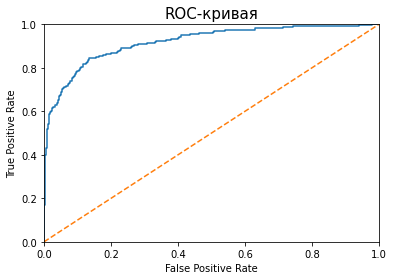

In [40]:
%%time

probabilities_test = grid.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, probabilities_test) 

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

plt.plot([0, 1], [0, 1], linestyle='--')

auc_roc = roc_auc_score(y_test, probabilities_test)

print("AUC-ROC:", auc_roc)

In [41]:
# Строим матрицу ошибок

def error_matrix(model, X_test, y_test):
    
    pred = model.predict(X_test)
    
    plt.figure(figsize = (8, 6))
    
    cm = confusion_matrix(y_test, pred)
    cm_display = sns.heatmap(cm/np.sum(cm), 
                             annot=True, fmt='.1%', cmap='Blues')
    
    cm_display.set(title='Матрица ошибок')
    cm_display.set(xlabel='Predicted', ylabel='Actual')
    
    plt.show()

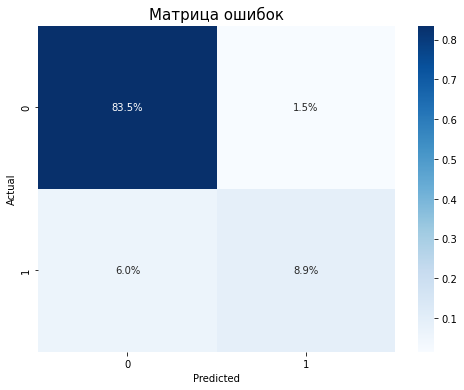

In [42]:
error_matrix(grid, X_test, y_test)

- Истинно положительных ответов 83.5% 
- Истинно отрицательных 8.9%
- Ложно положительных 1.5%
- Ложно отрицательных 6%

In [43]:
# Важность признаков
imp_data = pd.DataFrame(grid.best_estimator_._final_estimator.feature_importances_,
                        index = X_test.columns, columns=['importances'])

print(imp_data.sort_values(by='importances', ascending=False))

                  importances
PaymentMethod       33.541362
PaperlessBilling    12.700310
Type                12.368809
MonthlyCharges       6.683644
gender               6.155007
Dependents           3.794623
UsageTime            3.052759
InternetService      2.954091
SeniorCitizen        2.419940
TotalCharges         2.272072
DeviceProtection     2.263823
MultipleLines        2.052826
TechSupport          1.861924
StreamingTV          1.716320
Partner              1.699991
OnlineSecurity       1.579392
StreamingMovies      1.578162
OnlineBackup         1.304946


**ВЫВОД 6:**

Проверили модель на ROC-кривой, посроили матрицу ошибой, посмотрели на важность признаков.

Занчание на тестовой выборке равно 0.91

### Сделать выводы

В рамках проекта решаем задачу для оператора связи «Ниединогоразрыва.ком», который хочет научиться прогнозировать отток клиентов.

**Цель проекта:** построить модель для прогноза оттока клиентов, с метрикой качества ROC_AUC >= 85.

**Задачи проекта:** 
- Изучить предметную область 
- Сделать предобработку данных 
- Провести исследовательский анализ 
- Обучить модели ML

Лучшее значение показала модель CatBoostClassifier, с параметрами: 
- random_state=280823, 
- l2_leaf_reg=4, 
- iterations=11000

Значение ROC_AUC на тесте = 0.91



# Отчет по работе

**Ключевые шаги в решении задачи:**
```python
1. Изучение общей информации
2. Предообработка данных
3. Исследовательский анализ данных
4. Подгтовка данных для обучения. Использование для моделей подходящих кодировщиков:        
    - для линейных  OneHotEncoder()
    - для деревьев OrdinalEncoder()    
5. Обучение нескольких моделей
6. Тестирование лучшей модели:
    - расчет метрики ROC-AUC на тесте - predict_proba
    - реализация матрицы ошибок
    - исследование важности призков
```

**Oтличия от исходного плана работы:**

Все пункты исходного плана выполнены без расхождений и в полном объеме.

**Трудности в работе:**

Трудностей в процессе реализации проекта не было 

**Предобработка данных**
```python 
На этапе предобработки были выполнены следующие шаги:
    1. Объединили таблицы 
    2. Изучили уникальные значения в данных
    3. Заменили значение No в признаке 'EndDate' на дату выгрузки датасета - '2020-02-01'
    4. Поработали с типами данных. Признаки с бинарными признаками не стали трогать, 
       проще их закодировать в процессе подготовки для обучения
    5. Нашли и обработали пропуски в:
        - InternetService     1526
        - OnlineSecurity      1526
        - OnlineBackup        1526
        - DeviceProtection    1526
        - TechSupport         1526
        - StreamingTV         1526
        - StreamingMovies     1526
        - MultipleLines        682
        
    6. На основе 'BeginDate' и 'EndDate' сгенерировали два новых признака:
        - UsageTime - количество дней
        - target - факт ухода клиента
        
    7. Чтобы не было подглядывания, избавились от 'BeginDate' и 'EndDate'
```

**Размер тестовой выборки:**
```Python
test_size = 0.25
```

**Параметр random_state:**
```Python
random_state=280823
```

**Описание итоговой модели:**
```python
CatBoostClassifier(random_state=280823, 
                   l2_leaf_reg=4,
                   iterations=11000, 
                   verbose=0)

```

**Значение AUC-ROC на тесте:**
``` Python
AUC-ROC: 0.91
```

**Список признаков, которые использовались для обучения:**
```python 
# Cписок всех бинарных признаков:    
- Type – тип оплаты: ежемесячный, годовой и тд
- PaperlessBilling – безналичный расчет
- PaymentMethod – способ оплаты
- gender - пол клиента
- Senior Citizen – наличие пенсионного статуса по возрасту
- Partner – наличие супруга(и)
- Dependents – наличие иждивенцев
- InternetService - интернет-сервис
- OnlineSecurity - онлайн-безопасность
- OnlineBackup - оперативное резервное копирование
- DeviceProtection - защита устройства
- TotalCharges – всего потрачено денег на услуги
- TechSupport - техническая поддержка
- StreamingTV - потоковое телевидение
- StreamingMovies - потоковое воспроизведение фильмов
- MultipleLines – наличие возможности ведения параллельных линий во время звонка

# Список всех численных признаков:    
- MonthlyCharges – ежемесячные траты на услуги
- TotalCharges - общие затраты 
- UsageTime - всего потрачено времени (количество дней)

# Целевой признак:
- target - факт ухода клиента

```